In [195]:
#Environment setup
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
#libraries loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [196]:
data_hnt = pd.read_csv("HNT-USD.csv")# Data loading


data_hnt.head()#data viewing

,Date,Open,High,Low,Close,Adj Close,Volume,key
0,2020-06-08,0.273462,0.279798,0.270841,0.277823,0.277823,83279,hnt-usd
1,2020-06-09,0.272190,0.283733,0.254260,0.272145,0.272145,66395,hnt-usd
2,2020-06-10,0.272866,0.315967,0.253391,0.276225,0.276225,82810,hnt-usd
3,2020-06-11,0.276145,0.351870,0.275626,0.291165,0.291165,87567,hnt-usd
4,2020-06-12,0.285552,0.331206,0.285237,0.328463,0.328463,92564,hnt-usd


In [197]:
data_hnt['Close'].value_counts() 

0.277823     1
0.272145     1
28.185028    1
28.310160    1
24.135775    1
            ..
18.661518    1
16.578852    1
16.854721    1
16.213619    1
2.441305     1
Name: Close, Length: 896, dtype: int64

In [198]:
df = data_hnt.loc[(data_hnt['key'] == 'hnt-usd')]
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,key
0,2020-06-08,0.273462,0.279798,0.270841,0.277823,0.277823,83279,hnt-usd
1,2020-06-09,0.272190,0.283733,0.254260,0.272145,0.272145,66395,hnt-usd
2,2020-06-10,0.272866,0.315967,0.253391,0.276225,0.276225,82810,hnt-usd
3,2020-06-11,0.276145,0.351870,0.275626,0.291165,0.291165,87567,hnt-usd
4,2020-06-12,0.285552,0.331206,0.285237,0.328463,0.328463,92564,hnt-usd
5,2020-06-13,0.328544,0.338803,0.300804,0.328925,0.328925,89671,hnt-usd
6,2020-06-14,0.329141,0.336357,0.302157,0.326149,0.326149,100285,hnt-usd
7,2020-06-15,0.326292,0.497925,0.300679,0.375721,0.375721,118513,hnt-usd
8,2020-06-16,0.375677,0.391116,0.313565,0.321992,0.321992,97182,hnt-usd
9,2020-06-17,0.321920,0.323185,0.289996,0.296361,0.296361,85888,hnt-usd


In [199]:
#date time collection
df = df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.loc[df['Date'] > pd.to_datetime('2020-06-08')]

In [200]:
df = df[['Date','Open','Close','High','Low','Volume']]

In [201]:
df.head()

,Date,Open,Close,High,Low,Volume
1,2020-06-09,0.272190,0.272145,0.283733,0.254260,66395
2,2020-06-10,0.272866,0.276225,0.315967,0.253391,82810
3,2020-06-11,0.276145,0.291165,0.351870,0.275626,87567
4,2020-06-12,0.285552,0.328463,0.331206,0.285237,92564
5,2020-06-13,0.328544,0.328925,0.338803,0.300804,89671


In [202]:
df = df[['Close']]

In [203]:
dataset = df.values
dataset = dataset.astype('float32')

In [204]:
dataset

array([[ 0.272145],
       [ 0.276225],
       [ 0.291165],
       [ 0.328463],
       [ 0.328925],
       [ 0.326149],
       [ 0.375721],
       [ 0.321992],
       [ 0.296361],
       [ 0.413362],
       [ 0.403567],
       [ 0.35634 ],
       [ 0.449611],
       [ 0.4543  ],
       [ 0.429402],
       [ 0.54213 ],
       [ 0.531633],
       [ 0.497622],
       [ 0.465284],
       [ 0.471469],
       [ 0.560336],
       [ 0.486238],
       [ 0.443873],
       [ 0.513154],
       [ 0.527909],
       [ 0.459997],
       [ 0.496277],
       [ 0.469959],
       [ 0.469193],
       [ 0.491265],
       [ 0.508659],
       [ 0.464972],
       [ 0.450899],
       [ 0.427905],
       [ 0.43219 ],
       [ 0.44467 ],
       [ 0.390246],
       [ 0.438109],
       [ 0.415029],
       [ 0.362562],
       [ 0.392114],
       [ 0.389489],
       [ 0.35416 ],
       [ 0.38647 ],
       [ 0.370436],
       [ 0.380544],
       [ 0.393125],
       [ 0.432998],
       [ 0.383245],
       [ 0.412615],


In [205]:
#Rescaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scale = scaler.fit_transform(dataset)

In [206]:
dataset_scale

array([[0.00000000e+00],
       [7.78045505e-05],
       [3.62707302e-04],
       [1.07397325e-03],
       [1.08278403e-03],
       [1.02984579e-03],
       [1.97517499e-03],
       [9.50573012e-04],
       [4.61794436e-04],
       [2.69298116e-03],
       [2.50619231e-03],
       [1.60558242e-03],
       [3.38424323e-03],
       [3.47366137e-03],
       [2.99886102e-03],
       [5.14856307e-03],
       [4.94838739e-03],
       [4.29980410e-03],
       [3.68312420e-03],
       [3.80107155e-03],
       [5.49574802e-03],
       [4.08271374e-03],
       [3.27482028e-03],
       [4.59599542e-03],
       [4.87737125e-03],
       [3.58230202e-03],
       [4.27415548e-03],
       [3.77227599e-03],
       [3.75766819e-03],
       [4.17857757e-03],
       [4.51027742e-03],
       [3.67717398e-03],
       [3.40880500e-03],
       [2.97031412e-03],
       [3.05202836e-03],
       [3.29001946e-03],
       [2.25216383e-03],
       [3.16490280e-03],
       [2.72477092e-03],
       [1.72423525e-03],


In [207]:
#training set size
train_size = int(len(dataset_scale) * 0.709)
test_size = len(dataset_scale) - train_size
train, test = dataset_scale[0:train_size, :], dataset_scale[train_size:len(dataset), :]
print(len(train), len(test))

634 261


In [208]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [209]:
look_back = 20
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [210]:
trainX
trainY
#testX
#testY

array([0.00549575, 0.00408271, 0.00327482, 0.004596  , 0.00487737,
       0.0035823 , 0.00427416, 0.00377228, 0.00375767, 0.00417858,
       0.00451028, 0.00367717, 0.00340881, 0.00297031, 0.00305203,
       0.00329002, 0.00225216, 0.0031649 , 0.00272477, 0.00172424,
       0.00228779, 0.00223773, 0.00156401, 0.00218016, 0.00187439,
       0.00206715, 0.00230707, 0.00306744, 0.00211866, 0.00267874,
       0.00285851, 0.00271651, 0.00402915, 0.00331757, 0.00393664,
       0.00426891, 0.00477056, 0.00539157, 0.00626092, 0.00665397,
       0.00608678, 0.00644447, 0.00734319, 0.00766898, 0.0113132 ,
       0.01798314, 0.02476963, 0.02861571, 0.02536052, 0.03137909,
       0.0263983 , 0.02571261, 0.0235958 , 0.02394526, 0.0233782 ,
       0.0235077 , 0.02387031, 0.02336649, 0.03130542, 0.02792984,
       0.02657844, 0.02663055, 0.02627584, 0.02818343, 0.02654457,
       0.0267826 , 0.0266952 , 0.0239125 , 0.02123462, 0.017961  ,
       0.01873231, 0.02041551, 0.01887946, 0.0198331 , 0.01868

In [211]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [212]:
#Model set-up
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(trainX, trainY, epochs=500, batch_size=270, verbose=2)

Epoch 1/500
3/3 - 1s - loss: 0.0743 - 842ms/epoch - 281ms/step
Epoch 2/500
3/3 - 0s - loss: 0.0676 - 6ms/epoch - 2ms/step
Epoch 3/500
3/3 - 0s - loss: 0.0610 - 5ms/epoch - 2ms/step
Epoch 4/500
3/3 - 0s - loss: 0.0552 - 6ms/epoch - 2ms/step
Epoch 5/500
3/3 - 0s - loss: 0.0496 - 5ms/epoch - 2ms/step
Epoch 6/500
3/3 - 0s - loss: 0.0443 - 6ms/epoch - 2ms/step
Epoch 7/500
3/3 - 0s - loss: 0.0396 - 6ms/epoch - 2ms/step
Epoch 8/500
3/3 - 0s - loss: 0.0351 - 5ms/epoch - 2ms/step
Epoch 9/500
3/3 - 0s - loss: 0.0309 - 6ms/epoch - 2ms/step
Epoch 10/500
3/3 - 0s - loss: 0.0271 - 6ms/epoch - 2ms/step
Epoch 11/500
3/3 - 0s - loss: 0.0238 - 6ms/epoch - 2ms/step
Epoch 12/500
3/3 - 0s - loss: 0.0206 - 6ms/epoch - 2ms/step
Epoch 13/500
3/3 - 0s - loss: 0.0178 - 5ms/epoch - 2ms/step
Epoch 14/500
3/3 - 0s - loss: 0.0154 - 6ms/epoch - 2ms/step
Epoch 15/500
3/3 - 0s - loss: 0.0134 - 6ms/epoch - 2ms/step
Epoch 16/500
3/3 - 0s - loss: 0.0117 - 7ms/epoch - 2ms/step
Epoch 17/500
3/3 - 0s - loss: 0.0103 - 5ms/ep

3/3 - 0s - loss: 0.0016 - 5ms/epoch - 2ms/step
Epoch 138/500
3/3 - 0s - loss: 0.0016 - 6ms/epoch - 2ms/step
Epoch 139/500
3/3 - 0s - loss: 0.0016 - 5ms/epoch - 2ms/step
Epoch 140/500
3/3 - 0s - loss: 0.0016 - 5ms/epoch - 2ms/step
Epoch 141/500
3/3 - 0s - loss: 0.0016 - 6ms/epoch - 2ms/step
Epoch 142/500
3/3 - 0s - loss: 0.0016 - 5ms/epoch - 2ms/step
Epoch 143/500
3/3 - 0s - loss: 0.0016 - 6ms/epoch - 2ms/step
Epoch 144/500
3/3 - 0s - loss: 0.0016 - 5ms/epoch - 2ms/step
Epoch 145/500
3/3 - 0s - loss: 0.0015 - 5ms/epoch - 2ms/step
Epoch 146/500
3/3 - 0s - loss: 0.0015 - 5ms/epoch - 2ms/step
Epoch 147/500
3/3 - 0s - loss: 0.0015 - 5ms/epoch - 2ms/step
Epoch 148/500
3/3 - 0s - loss: 0.0015 - 6ms/epoch - 2ms/step
Epoch 149/500
3/3 - 0s - loss: 0.0015 - 5ms/epoch - 2ms/step
Epoch 150/500
3/3 - 0s - loss: 0.0015 - 5ms/epoch - 2ms/step
Epoch 151/500
3/3 - 0s - loss: 0.0015 - 6ms/epoch - 2ms/step
Epoch 152/500
3/3 - 0s - loss: 0.0015 - 5ms/epoch - 2ms/step
Epoch 153/500
3/3 - 0s - loss: 0.0015 

Epoch 272/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 273/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 274/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 275/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 276/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 277/500
3/3 - 0s - loss: 0.0012 - 5ms/epoch - 2ms/step
Epoch 278/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 279/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 280/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 281/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 282/500
3/3 - 0s - loss: 0.0012 - 5ms/epoch - 2ms/step
Epoch 283/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 284/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 285/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 286/500
3/3 - 0s - loss: 0.0012 - 5ms/epoch - 2ms/step
Epoch 287/500
3/3 - 0s - loss: 0.0012 - 6ms/epoch - 2ms/step
Epoch 288/500
3/3 - 0s -

Epoch 406/500
3/3 - 0s - loss: 9.8125e-04 - 5ms/epoch - 2ms/step
Epoch 407/500
3/3 - 0s - loss: 9.7988e-04 - 6ms/epoch - 2ms/step
Epoch 408/500
3/3 - 0s - loss: 9.7700e-04 - 5ms/epoch - 2ms/step
Epoch 409/500
3/3 - 0s - loss: 9.7448e-04 - 6ms/epoch - 2ms/step
Epoch 410/500
3/3 - 0s - loss: 9.7343e-04 - 5ms/epoch - 2ms/step
Epoch 411/500
3/3 - 0s - loss: 9.7209e-04 - 6ms/epoch - 2ms/step
Epoch 412/500
3/3 - 0s - loss: 9.7076e-04 - 5ms/epoch - 2ms/step
Epoch 413/500
3/3 - 0s - loss: 9.6890e-04 - 6ms/epoch - 2ms/step
Epoch 414/500
3/3 - 0s - loss: 9.7040e-04 - 6ms/epoch - 2ms/step
Epoch 415/500
3/3 - 0s - loss: 9.7020e-04 - 5ms/epoch - 2ms/step
Epoch 416/500
3/3 - 0s - loss: 9.6605e-04 - 6ms/epoch - 2ms/step
Epoch 417/500
3/3 - 0s - loss: 9.6522e-04 - 5ms/epoch - 2ms/step
Epoch 418/500
3/3 - 0s - loss: 9.6429e-04 - 6ms/epoch - 2ms/step
Epoch 419/500
3/3 - 0s - loss: 9.6257e-04 - 6ms/epoch - 2ms/step
Epoch 420/500
3/3 - 0s - loss: 9.6099e-04 - 5ms/epoch - 2ms/step
Epoch 421/500
3/3 - 0s - 

In [213]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

8/8 [==============================] - 0s 922us/step


In [214]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [215]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.55 RMSE
Test Score: 1.02 RMSE


In [216]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
 

In [217]:
 # shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

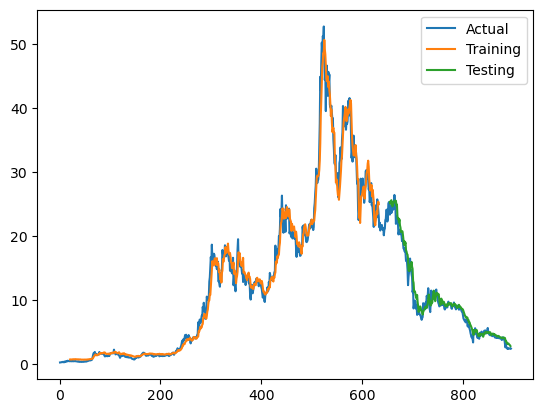

In [218]:
plt.plot(df['Close'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [219]:
from sklearn.metrics import mean_squared_error

mean_squared_error(testY[0].reshape(-1),testPredict[:, 0])



1.0490172007591865

In [220]:
    from keras.models import load_model
    model.save('hnt.h5') 
    model.save_weights('hnt_weights.h5')  # to store